# Análisis exploratorio básico de datos

## Carga del dataset

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv("datasets/titanic.csv")

In [3]:
df.head()

,row,clase_pasajero,superviviente,nombre,genero,edad,siblings,padres_hijos,ticket,fare,cabin,puerto_embarque,lifeboat,body_id,home.dest
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.shape

(1309, 15)

In [5]:
df.columns.values

array(['row', 'clase_pasajero', 'superviviente', 'nombre', 'genero',
       'edad', 'siblings', 'padres_hijos', 'ticket', 'fare', 'cabin',
       'puerto_embarque', 'lifeboat', 'body_id', 'home.dest'],
      dtype=object)

In [6]:
df.dtypes

row                  int64
clase_pasajero       int64
superviviente        int64
nombre              object
genero              object
edad               float64
siblings             int64
padres_hijos         int64
ticket              object
fare               float64
cabin               object
puerto_embarque     object
lifeboat            object
body_id            float64
home.dest           object
dtype: object

In [7]:
#missing values

print(pd.notnull(df["body_id"]).values.ravel().sum())
pd.notnull(df["body_id"]).values.ravel()

121


array([False, False, False, ...,  True, False, False])

In [8]:
# resumen estadístico

df.describe()

,row,clase_pasajero,superviviente,edad,siblings,padres_hijos,fare,body_id
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,654.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,0.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,327.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,654.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,981.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1308.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Visualizaciones

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='edad', ylabel='siblings'>

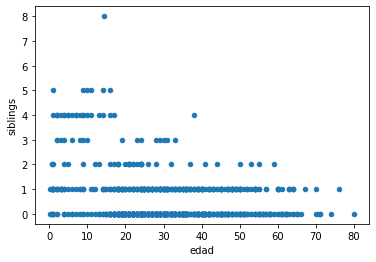

In [10]:
# scatter plot

df.plot(kind="scatter", x="edad", y="siblings")

Text(0.5, 1.0, 'Histograma de tipo de clase del pasajero')

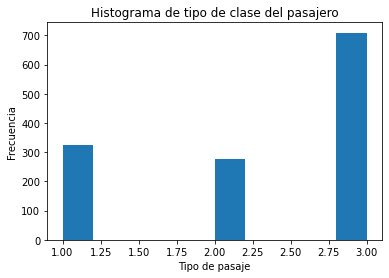

In [11]:
# histograma de frecuencias

plt.hist(df["clase_pasajero"])
plt.xlabel("Tipo de pasaje")
plt.ylabel("Frecuencia")
plt.title("Histograma de tipo de clase del pasajero")

Text(0.5, 1.0, 'Histograma de edades de los pasajeros')

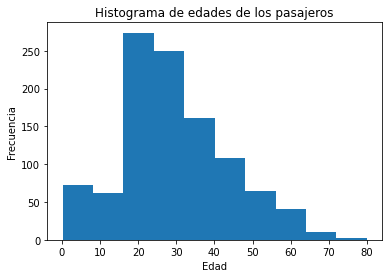

In [12]:
plt.hist(df["edad"]) 
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de edades de los pasajeros")

Text(0.5, 1.0, 'Boxplot de tarifas')

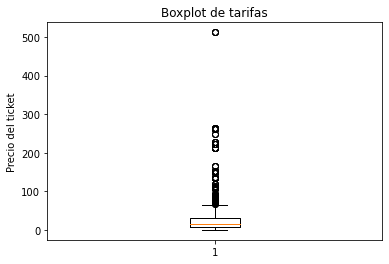

In [13]:
# Boxplot
plt.boxplot(df["fare"].dropna()) ##ojo que no acepta valores nulos
plt.ylabel("Precio del ticket")
plt.title("Boxplot de tarifas")

# variables dummy

In [22]:
dummy_genero = pd.get_dummies(df["genero"], prefix="genero")
dummy_genero

,genero_female,genero_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [23]:
df2 = pd.concat([df, dummy_genero], axis = 1)
df2

,row,clase_pasajero,superviviente,nombre,genero,edad,siblings,padres_hijos,ticket,fare,cabin,puerto_embarque,lifeboat,body_id,home.dest,genero_female,genero_male
0,0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,1,0
1305,1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,1,0
1306,1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,0,1
1307,1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,0,1


# Correlación

In [24]:
df2.corr()

,row,clase_pasajero,superviviente,edad,siblings,padres_hijos,fare,body_id,genero_female,genero_male
row,1.000000,0.897822,-0.293717,-0.343888,0.065594,0.003584,-0.481215,0.015558,-0.124599,0.124599
clase_pasajero,0.897822,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642,-0.124617,0.124617
superviviente,-0.293717,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN,0.528693,-0.528693
edad,-0.343888,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809,-0.063646,0.063646
siblings,0.065594,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961,0.109609,-0.109609
padres_hijos,0.003584,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099,0.213125,-0.213125
fare,-0.481215,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110,0.185523,-0.185523
body_id,0.015558,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000,0.015903,-0.015903
genero_female,-0.124599,-0.124617,0.528693,-0.063646,0.109609,0.213125,0.185523,0.015903,1.000000,-1.000000
genero_male,0.124599,0.124617,-0.528693,0.063646,-0.109609,-0.213125,-0.185523,-0.015903,-1.000000,1.000000


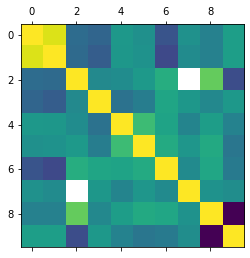

In [25]:
plt.matshow(df2.corr())

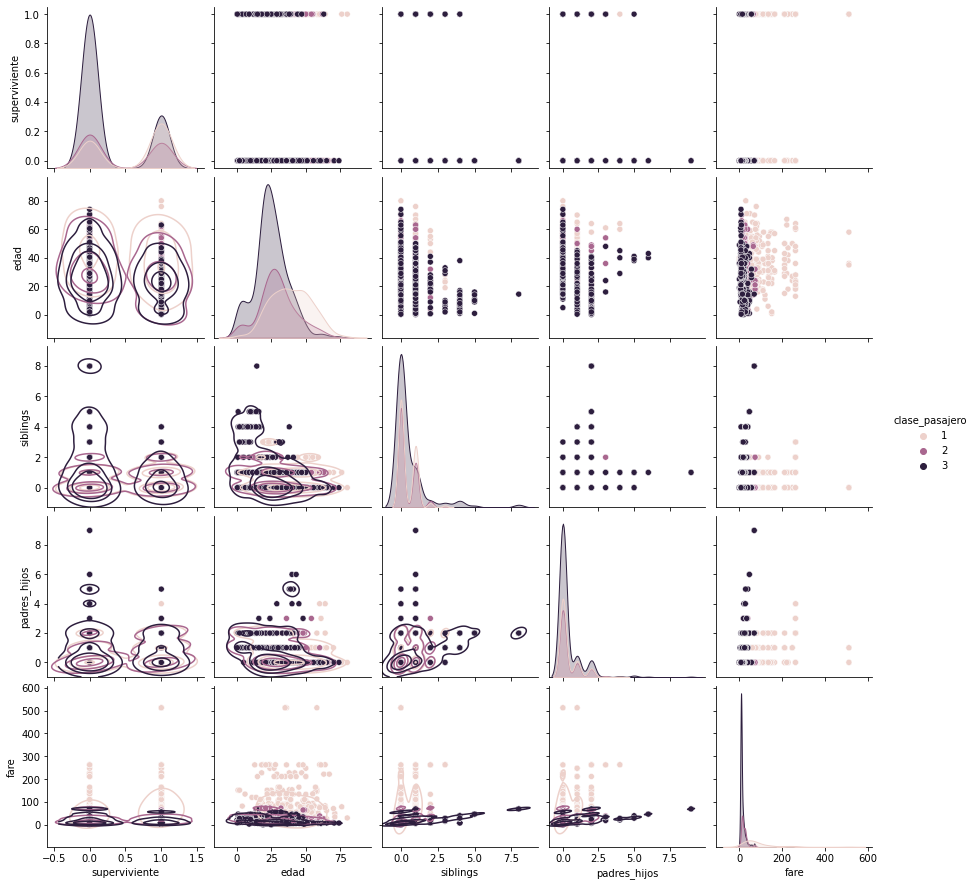

In [27]:
# más elaborado

import seaborn as sns

data = df2[["clase_pasajero","superviviente","lifeboat","edad","siblings","padres_hijos","fare","genero"]]
g = sns.pairplot(data, hue="clase_pasajero", diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

# Conjuntos de entrenamiento y test

In [33]:
from sklearn.model_selection import train_test_split

In [31]:
train, test = train_test_split(data, test_size = 0.2)

In [32]:
print("Entrenamiento: " + str(len(train)))
print("Test: " + str(len(test)))

Entrenamiento: 1047
Test: 262
